## Bayes learn (chapter 4)

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

def lineplot(x, y):
    plt.plot(x,y)
    plt.xlabel('Hypotheses')
    plt.ylabel('Probabilities')

In [10]:
from __future__ import division, unicode_literals
import logging

class Bayes(object):
    """A bayes class, mainly a dictionary"""
    def __init__(self, hypos=None, name=''):
        """
        Initialize the distribution.
        
        hypos: sequence of hypotheses
        """
        self.name = name
        self.pmf = {}
        if hypos is None:
            return
        
        self.hypos = hypos
        # Initiate the class object
        # Three initalize methods are used to deal with different types of input
        # 
        init_methods = [
            self.InitPmf,
            self.InitMapping,  #A dict
            self.InitSequence, #equal probability for all hypos
            self.InitFailure,
        ]
        
        for method in init_methods:
            try:
                method(hypos)
                break
            except AttributeError:
                continue
        
        if len(self):
            self.Normalize()
    
    def __str__(self):
        '''
        Stringlize self.pmf
        '''
        tmpL = ["Probability table"]
        for hypo, prob in sorted(self.pmf.iteritems()):
            tmpL.append('\t'.join([str(hypo), str(prob)]))
        return '\n'.join(tmpL)
    
    def InitSequence(self, hypos):
        """
        Initialize with a sequence of hypos with equal probabilities.
        
        hypos: ['H1','H2','H3',...]
        """
        for hypo in hypos:
            self.Set(hypo, 1)
    
    def InitMapping(self, hypos):
        """
        Initialize with a map from value to probablity (a dict).
        
        hypos = {'H1':1, 'H2':5, 'H3':4}
        """
        for hypo, prob in hypos.iteritems():
            self.Set(hypo, prob)
    
    def InitPmf(self, hypos):
        """
        Initialize with a Bayes object.
        
        hypos = Bayes()
        """
        for hypo, prob in hypos.iteritems():
            self.Set(hypo, prob)
    
    def InitFailure(self, hypos):
        """Raise an errot"""
        raise ValueError("None of the initialization methods works.")
    
    def __len__(self):
        return len(self.pmf)
    
    def Set(self, hypo, prob=0):
        """
        Set hypo-prob pair
        """
        self.pmf[hypo] = prob
    
    def Print(self):
        """Print the values and freqs in asending order."""
        for hypo, prob in sorted(self.pmf.iteritems()):
            print hypo, prob
    
    def Normalize(self):
        """
        Normalize probability
        """
        total = float(sum(self.pmf.values()))
        if total == 0.0:
            raise ValueError('total probability is zero.')
            logging.warning('Normalize: total probability is zero.')
            return total
        
        factor = 1 / total
        
        for hypo in self.pmf:
            self.pmf[hypo] *= factor
    
    def Items(self):
        '''Return two lists, hypos_list and probability_list'''
        if isinstance(self.hypos, list):
            hypos = self.hypos
        else:
            hypos = self.pmf.keys()
            hypos.sort()
        probs = [self.pmf[hypo] for hypo in hypos]
        return hypos, probs
    
    def Max(self):
        '''Return the hypothesis with maximum posterior probability'''
        max_prob, max_hypo = max([(prob,hypo) for hypo, prob in self.pmf.iteritems()])
        return max_hypo, max_prob
    
    def Mult(self, hypo, likelihood):
        '''
        Update given hypo probability by given likelihood
        '''
        self.pmf[hypo] = self.pmf.get(hypo,0) * likelihood
    
    def Prob(self, hypo, default=0):
        """
        Get the probability of given hypo.
        """
        return self.pmf.get(hypo, default)
    
    def Update(self,dataL):
        '''
        Update all hypo probability by given obervation.
        
        dataL: A list of observations.
        '''
        for data in dataL:
            for hypo, prob in self.pmf.iteritems():
                self.pmf[hypo] = prob * self.Likelihood(hypo, data)
        self.Normalize()
    
    def Likelihood(self, hypo, data):
        '''
        Re-constructed in child class
        '''
        psss
    
    def Mean(self):
        '''
        Compute the weighted hypothesis using posterior probabilities.
        '''
        total = 0
        for hypo, prob in self.pmf.iteritems():
            total += hypo * prob
        return total
    
    def Percentile(self, percentage):
        '''
        Compute a percentile for a given percentage.
        
        percentage: float from 0 to 100.
        ''' 
        if isinstance(self.hypos, list):
            hypos = self.hypos
        else:
            hypos = self.pmf.keys()
            hypos.sort()
        total = 0
        assert 0<=percentage<=100, "percentage must between [0,100]"
        percentile_value = percentage / 100.0
        for hypo in hypos:
            total += self.pmf[hypo]
            if total >= percentile_value:
                return hypo

### 4.1 欧元问题

When spun on edge 250 times, a Belgian one-euro coin
came up heads 140 times and tails 110. ‘It looks very
suspicious to me,’ said Barry Blight, a statistics lecturer
at the London School of Economics. ‘If the coin were
unbiased, the chance of getting a result as extreme as
that would be less than 7%.’

But do these data give evidence that the coin is biased rather
than fair?



一枚欧元硬币抛掷250次之后，发现有140次看到正面，110次看到背面。伦敦经济学院的统计学老师Barry Blight说“这枚欧元硬币看起来很可疑。如果它是均匀的，抛掷相同次数得到这个结果的概率为7%。”请问这些数据能否说明硬币是均匀的？

* 观察到的数据 D: 140次正面，100次负面
* 假设
    * H1：硬币是均匀的
    * H2：硬币是不均一的

* $P(H1|D) = \frac{P(H1) * P(D|H1)}{P(D)} = P(H1) * {250 \choose 140}\Bigl(\frac{1}{2}\Bigl)^{140} * \Bigl(\frac{1}{2}\Bigl)^{100}$

* $P(H2|D) = \frac{P(H2) * P(D|H2)}{P(D)} = P(H2) * {250 \choose 140}\Bigl(P(正面)\Bigl)^{140} * \Bigl(P(反面)\Bigl)^{100}$

问题是，
    * P(H1)未知；
    * 给定H2后，P(正面)的概率不确定

为了解决这个问题，我们需要换一种思路。我们把假设做的更明确些，即我们假设硬币抛掷一次正面出现的概率为0到100，共101个假设。并且假定每个假设出现的频率是相等的。在此基础上，我们计算各个假设的后验概率。

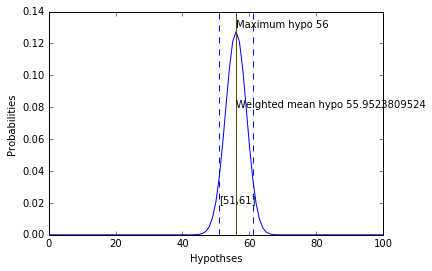

In [19]:
class Coins(Bayes):
    def Likelihood(self, hypo, data):
        
        if data == 'H':
            return hypo / 100.0
        else:
            return 1-hypo/100.0

hypos = [i for i in range(0,101)]

coins = Coins(hypos)

# 对于观察数据的处理，我们把它分解成250次观察。
# 得到250次观察结果，其中140个H和110个T
dataset = 'H' * 140 + 'T' * 110

# 对于不同的假设，出现H和T的组合数目时一致的。

coins.Update(dataset)

#print coins
hypo, prob = coins.Items()
max_hypo, max_prob = coins.Max() 
plt.plot(hypo, prob)
plt.xlabel('Hypothses')
plt.ylabel('Probabilities')
plt.axvline(max_hypo, color='r')
plt.annotate(xy=(max_hypo, 0.13),s="Maximum hypo "+str(max_hypo))
weighted_mean_hypo = coins.Mean()
plt.axvline(weighted_mean_hypo,color='g',alpha=0.6)
plt.annotate(xy=(weighted_mean_hypo,0.08),s="Weighted mean hypo "+str(weighted_mean_hypo))

lower_5 = coins.Percentile(5)
upper_95 = coins.Percentile(95)
plt.axvline(lower_5,color='b',ls="dashed")
plt.axvline(upper_95,color='b',ls="dashed")
plt.annotate(xy=(lower_5,0.02),s="["+str(lower_5)+','+str(upper_95)+']')

从上面的计算可以看出，概率值最大的假设是56。这与观察到的正面出现的概率`140/250=56%`一致。因此观察到的比例是最大的似然值估计。其90%的置信区间为`[51,61]`。而`50%`正好不在这个置信区间内，表明这个硬币是不均匀的。

在开始时，我们提出的问题是“这些数据是否可以支持硬币是不均匀的”。那么怎么才能说明一份证据是否支持一个假设呢？

这儿可能有一个困惑，既然我们想知道硬币是不是均匀的，那么我们为什么不计算硬币是均匀的概率即`coins.Prob(50)`的数值? 这个值时0.021，但这个值却没有任何意义。因为这是在我们做出的101个假设的基础上得到的，而实际上硬币的不均匀程度是连续分布的，可以做出的假设数目会很多，这时每部分的概率也会相应变化。

### 4.3 欧元问题（不同的先验概率）

前面我们对提出的101个假设分配了相同的概率，但这可能并不妥当。如果一个硬币是不均匀的，那么随着这个不均匀率离50%越远，则发生的概率越低。

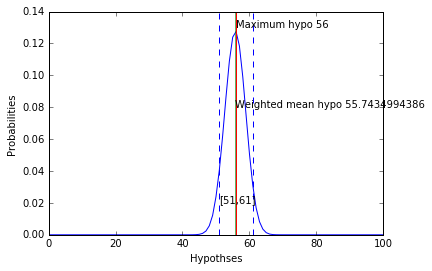

In [21]:
class Coins(Bayes):
    def Likelihood(self, hypo, data):
        
        if data == 'H':
            return hypo / 100.0
        else:
            return 1-hypo/100.0

#hyposD = [i for i in range(0,101)]

hyposL = []

for i in range(0,101):
    if i < 51:
        hyposL.append((i,i))
    else:
        hyposL.append((i,100-i))

hyposD = dict(hyposL)

coins = Coins(hyposD)

# 对于观察数据的处理，我们把它分解成250次观察。
# 得到250次观察结果，其中140个H和110个T
dataset = 'H' * 140 + 'T' * 110

# 对于不同的假设，出现H和T的组合数目时一致的。

coins.Update(dataset)

#print coins
hypo, prob = coins.Items()
max_hypo, max_prob = coins.Max() 
plt.plot(hypo, prob)
plt.xlabel('Hypothses')
plt.ylabel('Probabilities')
plt.axvline(max_hypo, color='r')
plt.annotate(xy=(max_hypo, 0.13),s="Maximum hypo "+str(max_hypo))
weighted_mean_hypo = coins.Mean()
plt.axvline(weighted_mean_hypo,color='g',alpha=0.6)
plt.annotate(xy=(weighted_mean_hypo,0.08),s="Weighted mean hypo "+str(weighted_mean_hypo))

lower_5 = coins.Percentile(5)
upper_95 = coins.Percentile(95)
plt.axvline(lower_5,color='b',ls="dashed")
plt.axvline(upper_95,color='b',ls="dashed")
plt.annotate(xy=(lower_5,0.02),s="["+str(lower_5)+','+str(upper_95)+']')

结果几乎完全相同，即在足够多的观察数据下，不同的先验概率最后都会收敛到相同的后验概率分布。在下面的图中我们会看的更清楚。

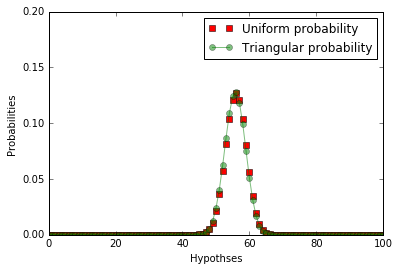

In [28]:
class Coins(Bayes):
    def Likelihood(self, hypo, data):
        
        if data == 'H':
            return hypo / 100.0
        else:
            return 1-hypo/100.0


        
uniform_prior_hypos = [i for i in range(0,101)]

hyposL = []

for i in range(0,101):
    if i < 51:
        hyposL.append((i,i))
    else:
        hyposL.append((i,100-i))

triangular_prior_hypos = dict(hyposL)

def getHyposProbs(prior_distribute):
    coins = Coins(prior_distribute)

    # 对于观察数据的处理，我们把它分解成250次观察。
    # 得到250次观察结果，其中140个H和110个T
    dataset = 'H' * 140 + 'T' * 110

    # 对于不同的假设，出现H和T的组合数目时一致的。

    coins.Update(dataset)

    #print coins
    hypo, prob = coins.Items()
    return hypo,prob

uniform_hypo, uniform_post = getHyposProbs(uniform_prior_hypos)
triangu_hypo, triangu_post = getHyposProbs(triangular_prior_hypos)

plt.plot(uniform_hypo, uniform_post, 'rs',label="Uniform probability")
plt.plot(triangu_hypo, triangu_post, 'go-',label="Triangular probability",alpha=0.5)
plt.xlabel('Hypothses')
plt.ylabel('Probabilities')
plt.axis([0, 100, 0, 0.2])
plt.legend()

### 4.4 数据集表示和似然函数优化

换一种方式来定义我们观察到的数据集和似然函数。这种计算方式类似于我们最先提出的那两个公式，可以大大提高计算效率。

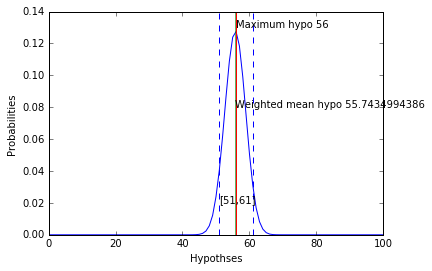

In [29]:
class Coins(Bayes):
    def Likelihood(self, hypo, data):
        heads, tails = data
        return (hypo/100.0)**heads * (1-hypo/100.0)**tails
        

#hyposD = [i for i in range(0,101)]

hyposL = []

for i in range(0,101):
    if i < 51:
        hyposL.append((i,i))
    else:
        hyposL.append((i,100-i))

hyposD = dict(hyposL)

coins = Coins(hyposD)

# 对于观察数据的处理，我们把它分解成250次观察。
# 得到250次观察结果，其中140个H和110个T
# dataset = 'H' * 140 + 'T' * 110
dataset = [(140,110)]

# 对于不同的假设，出现H和T的组合数目时一致的。

coins.Update(dataset)

#print coins
hypo, prob = coins.Items()
max_hypo, max_prob = coins.Max() 
plt.plot(hypo, prob)
plt.xlabel('Hypothses')
plt.ylabel('Probabilities')
plt.axvline(max_hypo, color='r')
plt.annotate(xy=(max_hypo, 0.13),s="Maximum hypo "+str(max_hypo))
weighted_mean_hypo = coins.Mean()
plt.axvline(weighted_mean_hypo,color='g',alpha=0.6)
plt.annotate(xy=(weighted_mean_hypo,0.08),s="Weighted mean hypo "+str(weighted_mean_hypo))

lower_5 = coins.Percentile(5)
upper_95 = coins.Percentile(95)
plt.axvline(lower_5,color='b',ls="dashed")
plt.axvline(upper_95,color='b',ls="dashed")
plt.annotate(xy=(lower_5,0.02),s="["+str(lower_5)+','+str(upper_95)+']')

### 4.5 β-分布

In probability theory and statistics, the beta distribution is a family of continuous probability distributions defined on the interval [0, 1] parametrized by two positive shape parameters, denoted by α and β, that appear as exponents of the random variable and control the shape of the distribution.

The beta distribution has been applied to model the behavior of random variables limited to intervals of finite length in a wide variety of disciplines. For example, it has been used as a statistical description of allele frequencies in population genetics;[1] time allocation in project management / control systems;[2] sunshine data;[3] variability of soil properties;[4] proportions of the minerals in rocks in stratigraphy;[5] and heterogeneity in the probability of HIV transmission.[6]

In Bayesian inference, the beta distribution is the conjugate prior probability distribution for the Bernoulli, binomial, negative binomial and geometric distributions. For example, the beta distribution can be used in Bayesian analysis to describe initial knowledge concerning probability of success such as the probability that a space vehicle will successfully complete a specified mission. The beta distribution is a suitable model for the random behavior of percentages and proportions.

The usual formulation of the beta distribution is also known as the beta distribution of the first kind, whereas beta distribution of the second kind is an alternative name for the beta prime distribution.

什么是β-分布？
，
在概率论和统计分析中，β分布是定义于区间[0,1]之上的连续概率分布，其分布模式由两个参数α和β控制，分别为随机变量的指数幂。

β分布常用于模拟随机变量在有限长度区间的行为模式，如群体遗传学中等位基因的频率，任务控制系统中的时间分配，天气的预测，HIV传播概率的异质性。

在贝叶斯推论中，β分布是伯努利分布、二项分布、负二项分布和几何分布的共轭先验概率分布。β分布可以用于在贝叶斯分析中描述成功率的起始分布，如果先验概率是β分布，那么后验概率也是β分布。

β分布的形状依赖于两个参数，α和β。如果先验概率分布的参数是`alpha`和`beta`，我们观察到`h`次正面和`t`次反面，后验概率也符合β分布，其参数是`alpha+h`和`beta+t`。这样，我们就可以通过加和来更新似然值。

幸运的是，对于很多现实的例子，β分布都可以用来作为先验概率的近似表示。对于均匀先验分布(`uniform prior`)来说，`aplha=1`和`beta=1`的β分布在`[0,1]`区间是均匀分布。




In [9]:
print max([(1,'a'),(2,'b'),(4,'d'),(3,'c')])

(4, u'd')


In [ ]:
print [for i in range(5) if i<2]

In [27]:
help(plt.axis)

Help on function axis in module matplotlib.pyplot:

axis(*v, **kwargs)
    Convenience method to get or set axis properties.
    
    Calling with no arguments::
    
      >>> axis()
    
    returns the current axes limits ``[xmin, xmax, ymin, ymax]``.::
    
      >>> axis(v)
    
    sets the min and max of the x and y axes, with
    ``v = [xmin, xmax, ymin, ymax]``.::
    
      >>> axis('off')
    
    turns off the axis lines and labels.::
    
      >>> axis('equal')
    
    changes limits of *x* or *y* axis so that equal increments of *x*
    and *y* have the same length; a circle is circular.::
    
      >>> axis('scaled')
    
    achieves the same result by changing the dimensions of the plot box instead
    of the axis data limits.::
    
      >>> axis('tight')
    
    changes *x* and *y* axis limits such that all data is shown. If
    all data is already shown, it will move it to the center of the
    figure without modifying (*xmax* - *xmin*) or (*ymax* -
    *ymin*)